In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
# Load weekly sales data
walmart_data = pd.read_csv('Walmart_DataSet.csv')

In [6]:
walmart_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [7]:
# Check for missing values
missing_values = walmart_data.isnull().sum()
missing_values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
# Basic statistics of numerical columns
stats = walmart_data.describe()
stats

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
# Select numeric columns for correlation analysis
numeric_columns = walmart_data.select_dtypes(include=[np.number])

In [10]:
# Compute correlation matrix
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


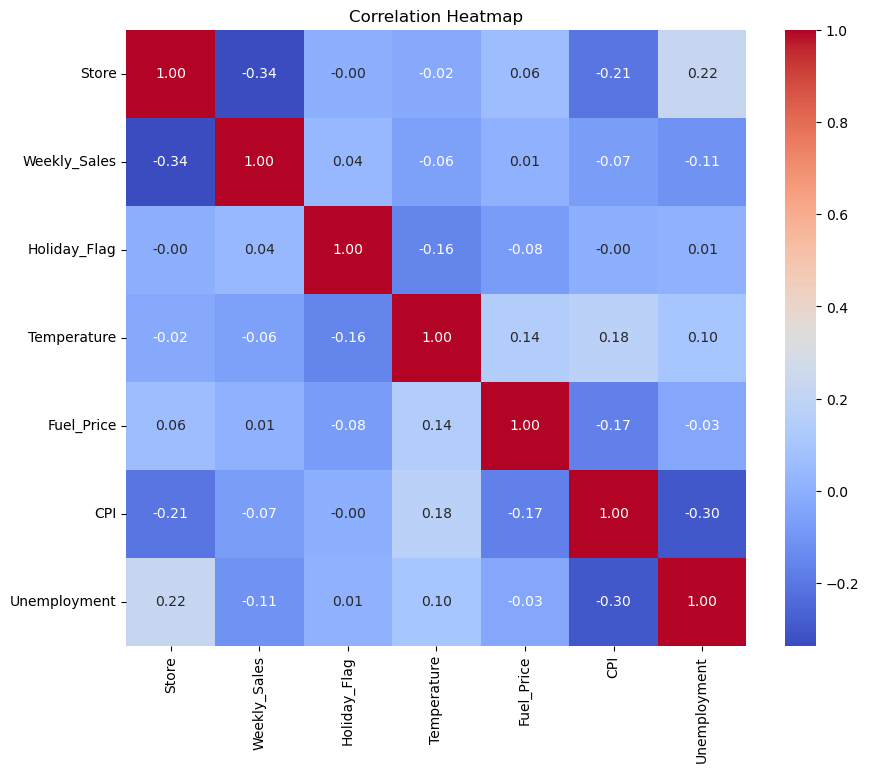

In [14]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

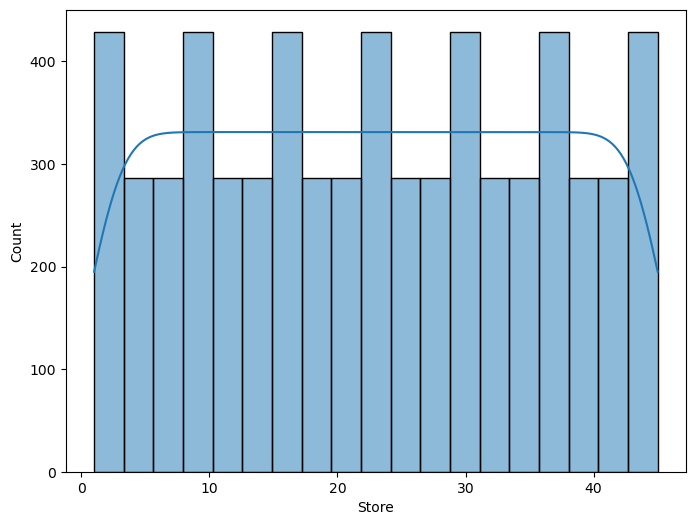

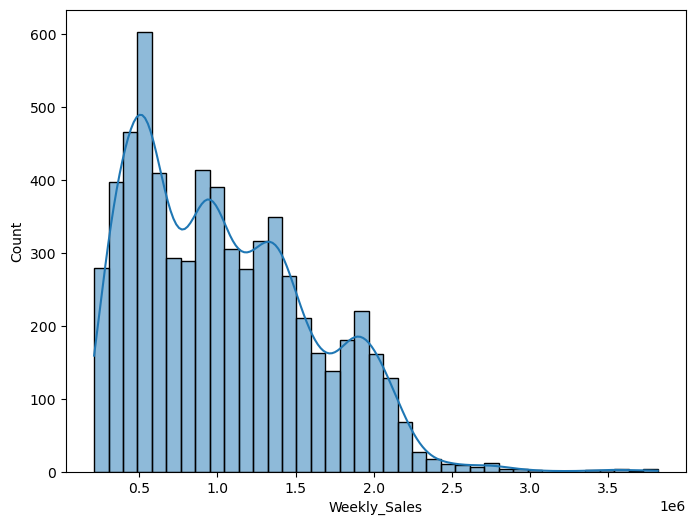

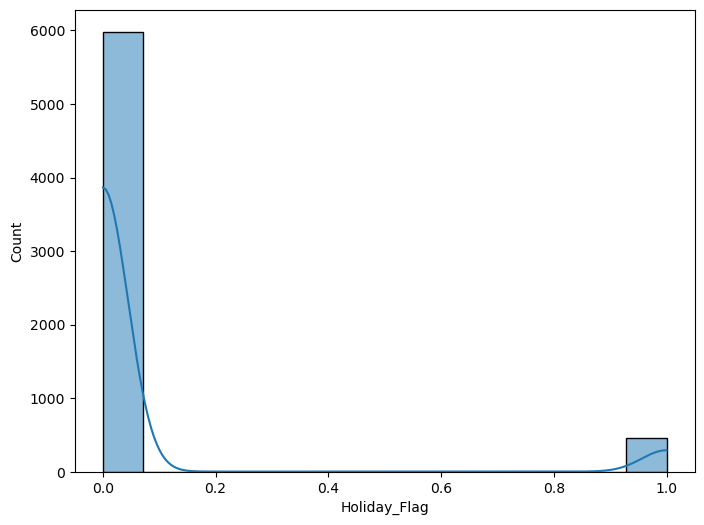

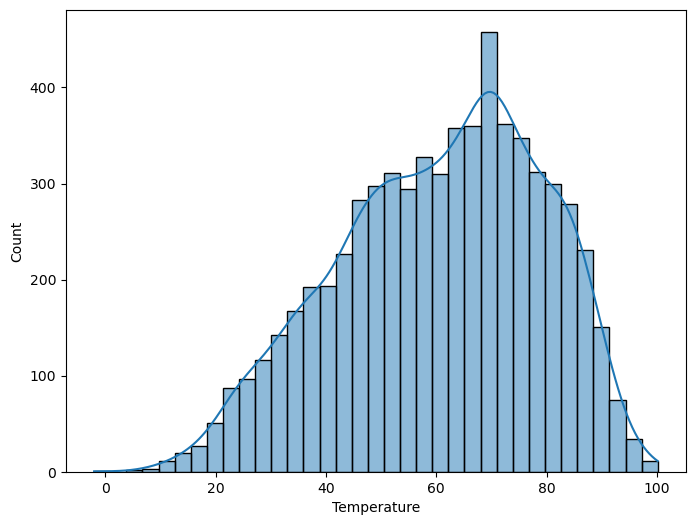

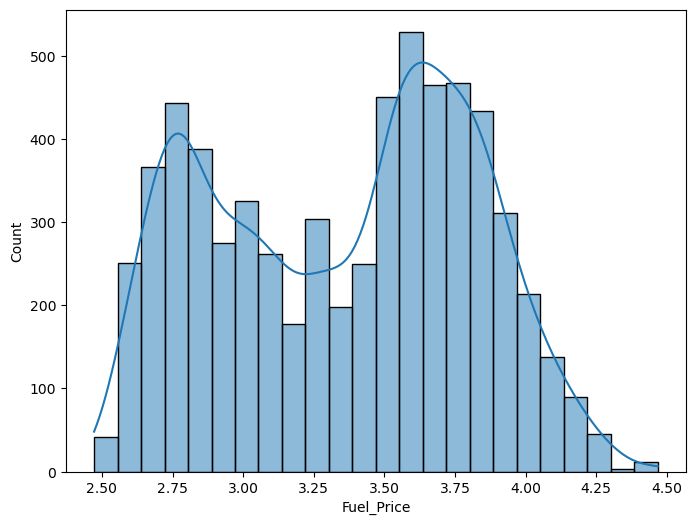

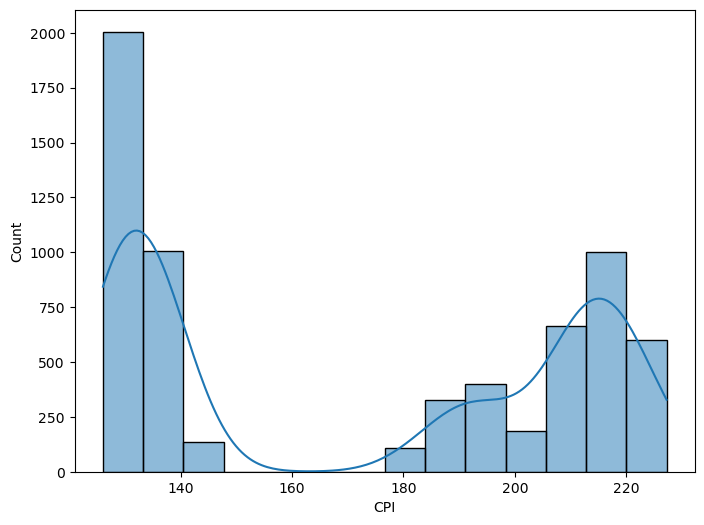

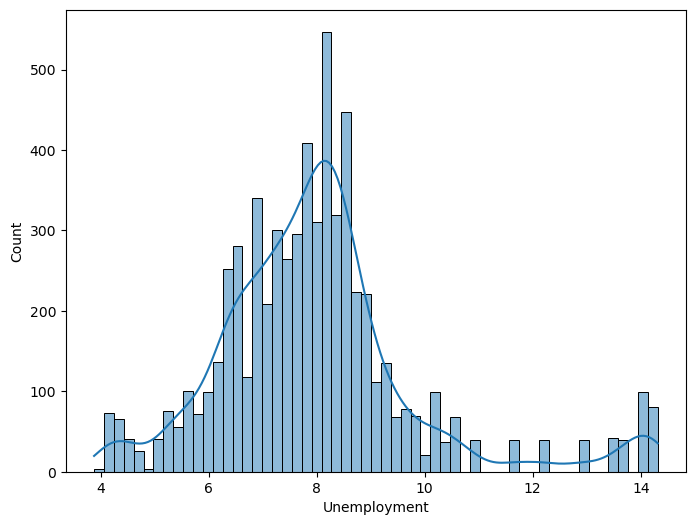

In [11]:
# Exploratory Data Analysis (EDA)
# Distribution of numerical columns
for column in walmart_data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(walmart_data[column], kde=True)

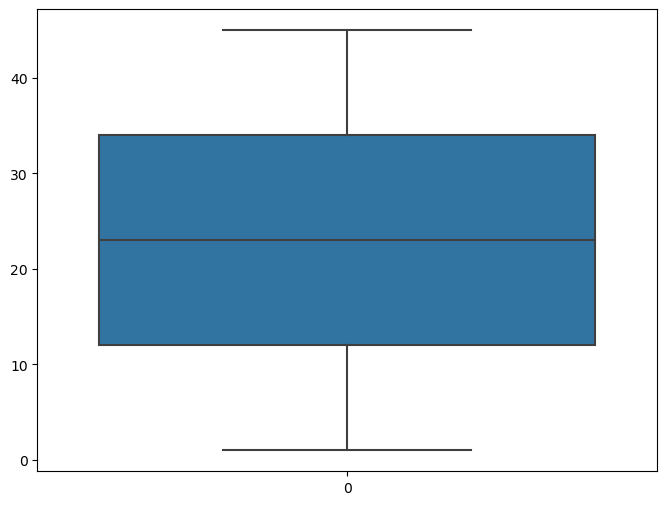

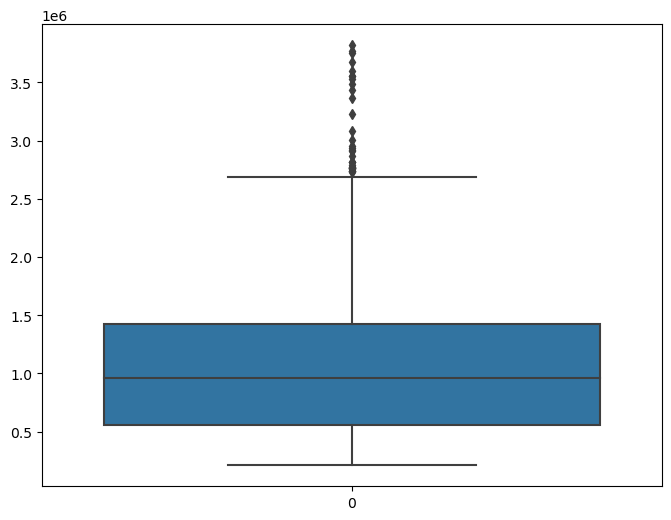

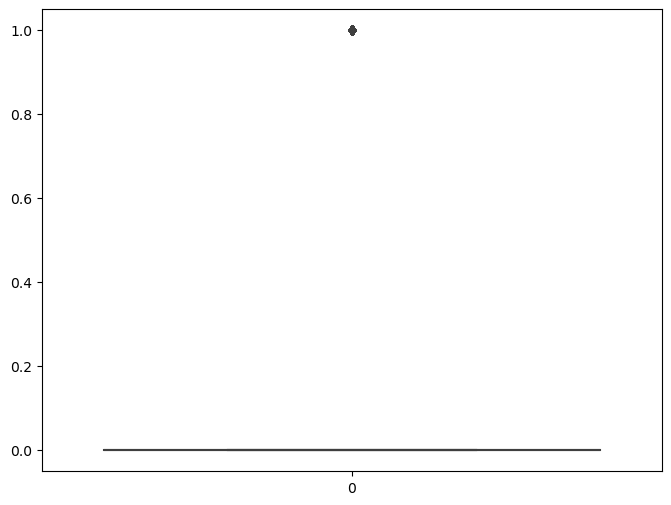

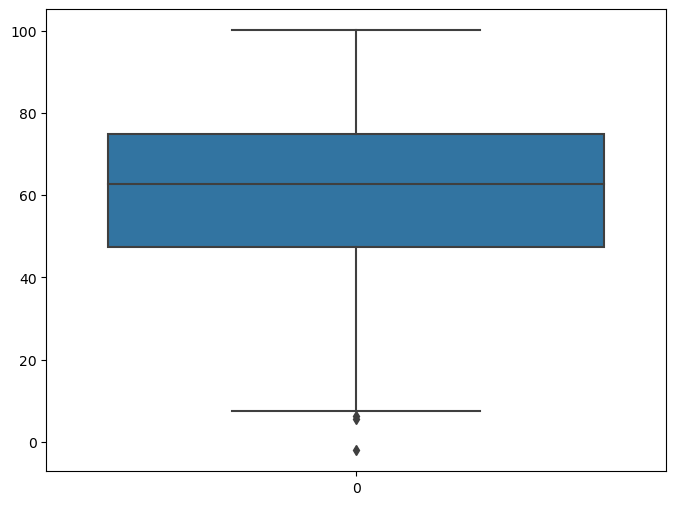

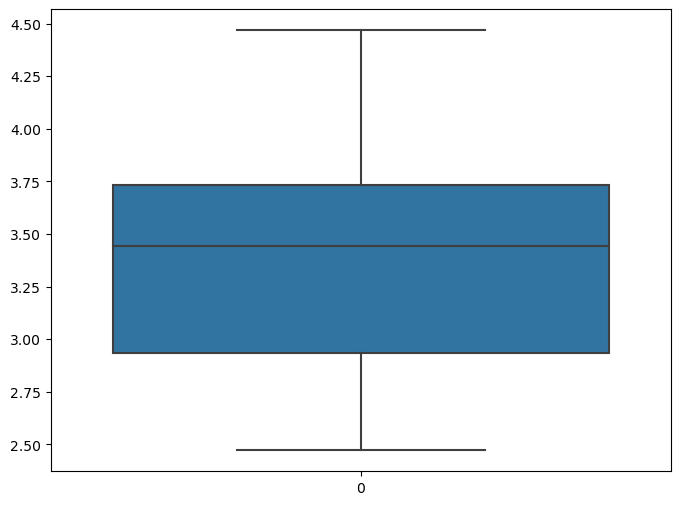

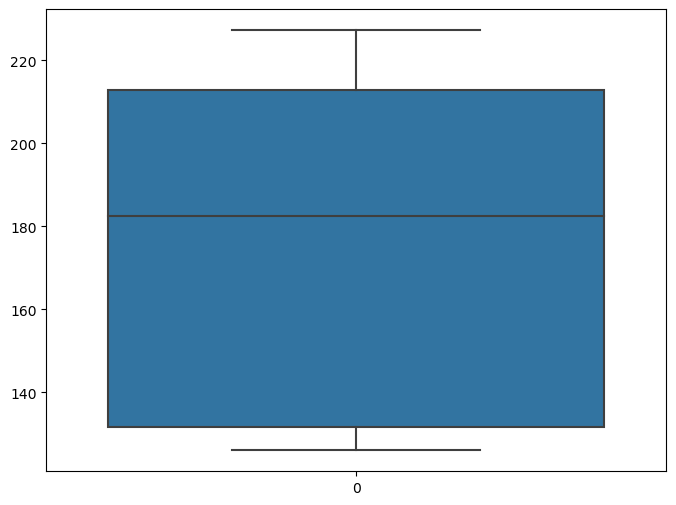

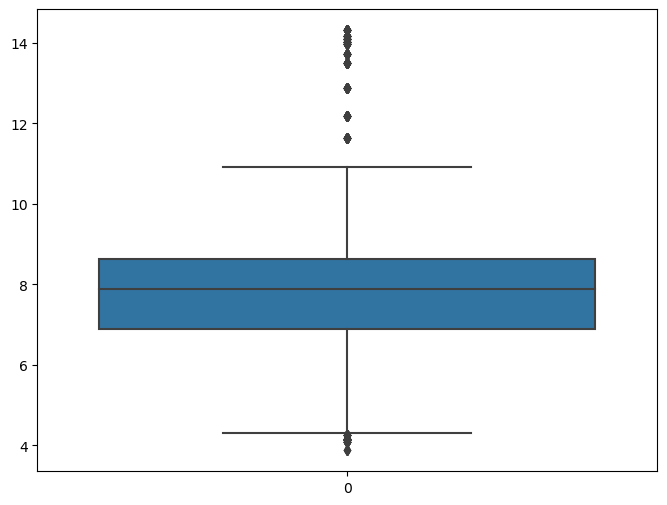

In [12]:
# Outlier analysis
# Boxplot of numerical columns
for column in walmart_data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(walmart_data[column])

In [20]:
#Merge the three columns based on the common key_column
merged_columns = pd.merge(walmart_data[['Weekly_Sales', 'Unemployment']], walmart_data['Store'], left_index=True, right_index=True)

In [21]:
## Display the merged columns
print(merged_columns)

      Weekly_Sales  Unemployment  Store
0       1643690.90         8.106      1
1       1641957.44         8.106      1
2       1611968.17         8.106      1
3       1409727.59         8.106      1
4       1554806.68         8.106      1
...            ...           ...    ...
6430     713173.95         8.684     45
6431     733455.07         8.667     45
6432     734464.36         8.667     45
6433     718125.53         8.667     45
6434     760281.43         8.667     45

[6435 rows x 3 columns]


In [22]:
# Concatenate the three columns horizontally
merged_columns = pd.concat([walmart_data['Weekly_Sales'], walmart_data['Unemployment'], walmart_data['Store']], axis=1)

In [25]:
merged_columns['Store'] = '1'

In [26]:
print(merged_columns.info())
print(merged_columns.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  6435 non-null   float64
 1   Unemployment  6435 non-null   float64
 2   Store         6435 non-null   object 
dtypes: float64(2), object(1)
memory usage: 150.9+ KB
None
   Weekly_Sales  Unemployment Store
0    1643690.90         8.106     1
1    1641957.44         8.106     1
2    1611968.17         8.106     1
3    1409727.59         8.106     1
4    1554806.68         8.106     1


In [27]:
# Calculate correlation between weekly sales and unemployment rate for each store
correlation_by_store = merged_columns.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment']))

In [28]:
# Sort stores based on correlation coefficient (absolute value) to identify the most affected stores
most_affected_stores = correlation_by_store.abs().sort_values(ascending=False)

In [29]:
# Display the most affected stores
print("Most affected stores and their correlation coefficients:")
print(most_affected_stores)

Most affected stores and their correlation coefficients:
Store
1    0.106176
dtype: float64


In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y')

<Figure size 1200x800 with 0 Axes>

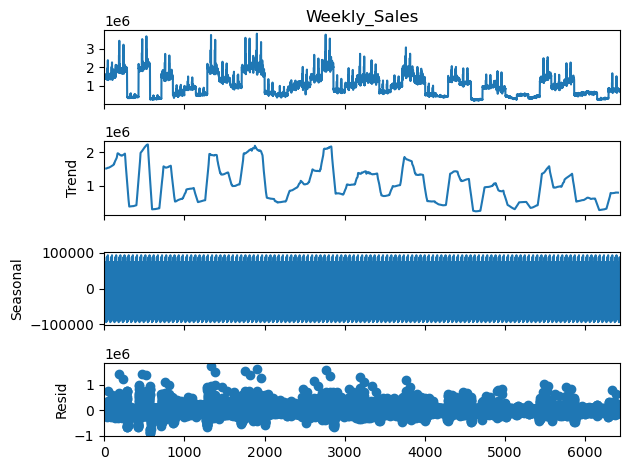

In [32]:
# Seasonal decomposition
decomposition = seasonal_decompose(walmart_data['Weekly_Sales'],model='additive', period=52) 
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

In [33]:
# Merge weekly sales and temperature data based on common column 
merged_data = pd.concat([walmart_data['Weekly_Sales'], walmart_data['Temperature']], axis=1)

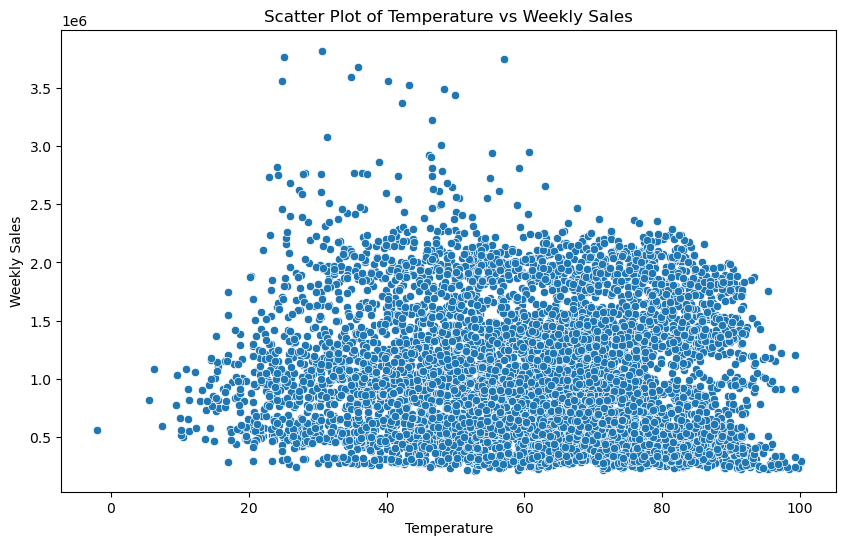

In [34]:
# EDA: Visualize relationship between temperature and weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Temperature', y='Weekly_Sales')
plt.title('Scatter Plot of Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

In [35]:
# Calculate correlation coefficient
correlation_coefficient = merged_data['Temperature'].corr(merged_data['Weekly_Sales'])
print("Correlation coefficient between temperature and weekly sales:", correlation_coefficient)

Correlation coefficient between temperature and weekly sales: -0.06381001317946958


In [36]:
from scipy.stats import ttest_ind

In [37]:
# Conduct a two-sample t-test to determine if there is a significant difference in weekly sales between different temperature groups
high_temp_sales = merged_data[merged_data['Temperature'] > merged_data['Temperature'].mean()]['Weekly_Sales']
low_temp_sales = merged_data[merged_data['Temperature'] <= merged_data['Temperature'].mean()]['Weekly_Sales']

In [38]:
# Perform t-test
t_statistic, p_value = ttest_ind(high_temp_sales, low_temp_sales)

In [39]:
# Check the p-value to determine the significance of the relationship
if p_value < 0.05:
    print("There is a significant difference in weekly sales between different temperature groups (p-value < 0.05)")
else:
    print("There is no significant difference in weekly sales between different temperature groups (p-value >= 0.05)")

There is a significant difference in weekly sales between different temperature groups (p-value < 0.05)


In [41]:
# Assume merged_data contains the merged dataset with 'Temperature' and 'Weekly_Sales' columns
# Perform regression analysis to quantify the impact of temperature on weekly sales
import statsmodels.api as sm
X = merged_data['Temperature'] 
y = merged_data['Weekly_Sales'] 

In [42]:
# Add constant to independent variable (temperature)
X = sm.add_constant(X)

In [43]:
# Fit ordinary least squares (OLS) regression model
model = sm.OLS(y, X).fit()

In [44]:
# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     26.30
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           3.01e-07
Time:                        23:46:39   Log-Likelihood:                -94339.
No. Observations:                6435   AIC:                         1.887e+05
Df Residuals:                    6433   BIC:                         1.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.165e+06   2.41e+04     48.279      

In [45]:
# Merge weekly sales and CPI data based on common column
merged_data = pd.concat([walmart_data['Weekly_Sales'], walmart_data['CPI']], axis=1)

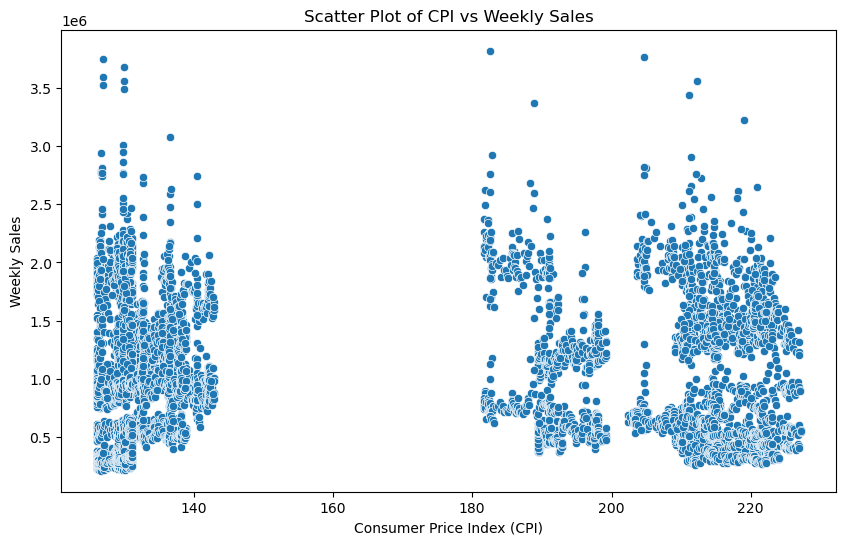

In [46]:
# EDA: Visualize relationship between CPI and weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='CPI', y='Weekly_Sales')
plt.title('Scatter Plot of CPI vs Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.show()

In [47]:
# Calculate correlation coefficient
correlation_coefficient = merged_data['CPI'].corr(merged_data['Weekly_Sales'])
print("Correlation coefficient between CPI and weekly sales:", correlation_coefficient)

Correlation coefficient between CPI and weekly sales: -0.07263416204017625


In [48]:
# Define independent variable (CPI) and dependent variable (weekly sales)
X = merged_data['CPI']
y = merged_data['Weekly_Sales']

In [49]:
# Add constant to independent variable (CPI)
X = sm.add_constant(X)

In [50]:
# Fit ordinary least squares (OLS) regression model
model = sm.OLS(y, X).fit()

In [51]:
# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     34.12
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           5.44e-09
Time:                        23:47:29   Log-Likelihood:                -94335.
No. Observations:                6435   AIC:                         1.887e+05
Df Residuals:                    6433   BIC:                         1.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.226e+06   3.14e+04     39.047      0.0

In [52]:
# Calculate total sales for each store
store_sales = walmart_data.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [53]:
# Sort stores based on total sales in descending order
top_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False)

In [54]:
# Display top performing stores
print("Top Performing Stores:")
print("----------------------")
print(top_stores)

Top Performing Stores:
----------------------
    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
22     23  1.987506e+08
23     24  1.940160e+08
10     11  1.939628e+08
27     28  1.892637e+08
40     41  1.813419e+08
31     32  1.668192e+08
17     18  1.551147e+08
21     22  1.470756e+08
11     12  1.442872e+08
25     26  1.434164e+08
33     34  1.382498e+08
39     40  1.378703e+08
34     35  1.315207e+08
7       8  1.299512e+08
16     17  1.277821e+08
44     45  1.123953e+08
20     21  1.081179e+08
24     25  1.010612e+08
42     43  9.056544e+07
14     15  8.913368e+07
6       7  8.159828e+07
41     42  7.956575e+07
8       9  7.778922e+07
28     29  7.714155e+07
15     16  7.425243e+07
36     37  7.420274e+07
29     30  6.27168

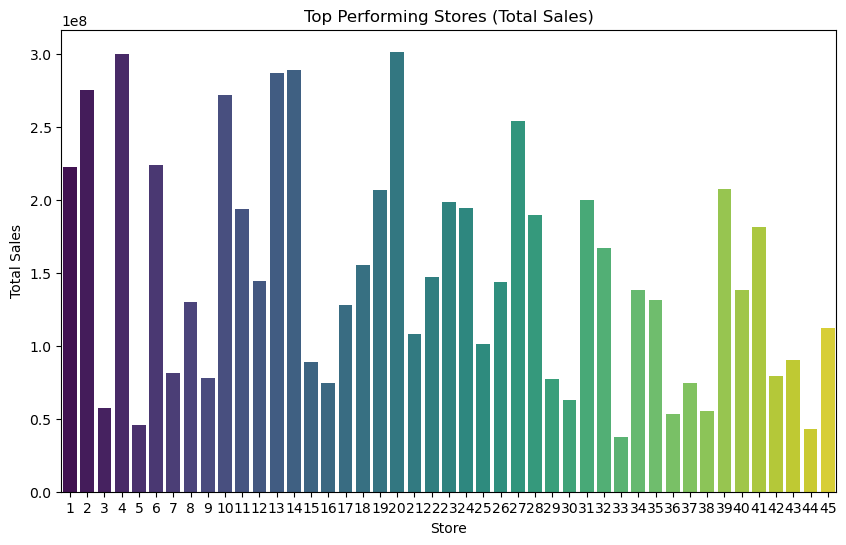

In [55]:
# Visualize top performing stores (optional)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_stores, x='Store', y='Weekly_Sales', palette='viridis')
plt.title('Top Performing Stores (Total Sales)')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [56]:
# Calculate total sales for each store
store_sales = walmart_data.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [57]:
# Identify the worst-performing store
worst_store = store_sales.sort_values(by='Weekly_Sales', ascending=True).iloc[0]

In [58]:
# Display the worst-performing store
print("Worst Performing Store:")
print("-----------------------")
print(worst_store)

Worst Performing Store:
-----------------------
Store                 33.00
Weekly_Sales    37160221.96
Name: 32, dtype: float64


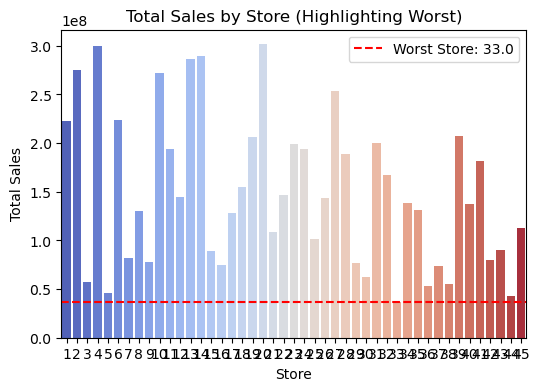

In [59]:
# Visualize the worst-performing store (optional)
plt.figure(figsize=(6, 4))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, order=store_sales['Store'], palette='coolwarm')
plt.axhline(y=worst_store['Weekly_Sales'], color='red', linestyle='--', label=f"Worst Store: {worst_store['Store']}")
plt.title('Total Sales by Store (Highlighting Worst)')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [60]:
# Identify the highest and lowest performing stores
highest_store = store_sales.sort_values(by='Weekly_Sales', ascending=False).iloc[0]
lowest_store = store_sales.sort_values(by='Weekly_Sales', ascending=True).iloc[0]

In [61]:
# Calculate the difference between the highest and lowest performing stores
sales_difference = highest_store['Weekly_Sales'] - lowest_store['Weekly_Sales']

In [62]:
# Print the information
print("Difference Between Highest and Lowest Performing Stores:")
print("---------------------------------------------------------")
print(f"Highest Performing Store: Store {highest_store['Store']} with Total Sales: {highest_store['Weekly_Sales']}")
print(f"Lowest Performing Store: Store {lowest_store['Store']} with Total Sales: {lowest_store['Weekly_Sales']}")
print(f"Sales Difference: {sales_difference}")


Difference Between Highest and Lowest Performing Stores:
---------------------------------------------------------
Highest Performing Store: Store 20.0 with Total Sales: 301397792.46
Lowest Performing Store: Store 33.0 with Total Sales: 37160221.96
Sales Difference: 264237570.49999997


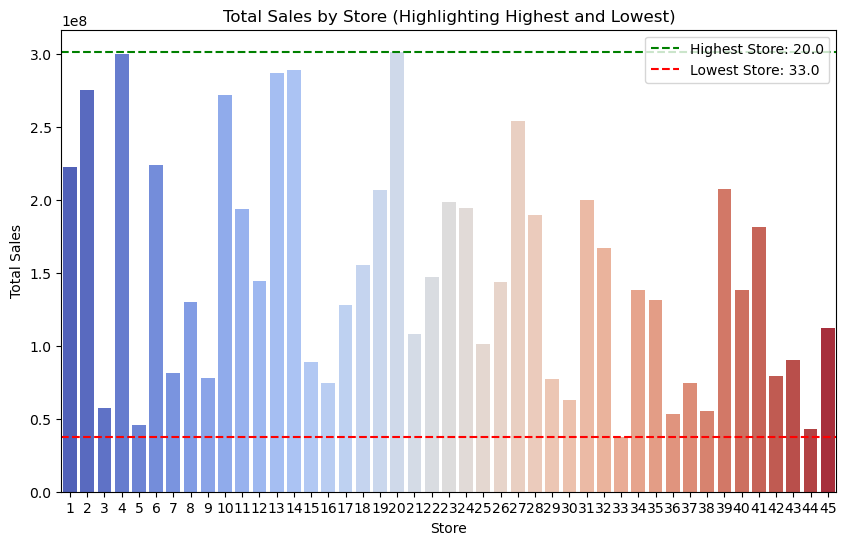

In [63]:
# Visualization to show the range between the highest and lowest performing stores
plt.figure(figsize=(10, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='coolwarm')
plt.axhline(y=highest_store['Weekly_Sales'], color='green', linestyle='--', label=f"Highest Store: {highest_store['Store']}")
plt.axhline(y=lowest_store['Weekly_Sales'], color='red', linestyle='--', label=f"Lowest Store: {lowest_store['Store']}")
plt.title('Total Sales by Store (Highlighting Highest and Lowest)')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [64]:
!pip install statsmodels matplotlib

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [67]:
# Ensure the 'Date' column is in datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])

In [68]:
# Setting 'Date' as the index
walmart_data.set_index('Date', inplace=True)

In [69]:
# Group by 'Store' to create a separate time series for each store
store_groups = walmart_data.groupby('Store')

In [70]:
# Defining the number of weeks to forecast
forecast_weeks = 12

In [71]:
# Initializing a dictionary to hold forecasts for each store
store_forecasts = {}

In [76]:
# Loop through each store and fitting a SARIMA model
for store, data in store_groups:
weekly_sales = data['Weekly_Sales'].resample('W').sum()

In [81]:
 # Fitting a SARIMA model
sarima_order = (1,1,1)  
seasonal_order = (1, 1, 1, 52)  
model = sm.tsa.SARIMAX(weekly_sales, order=sarima_order, seasonal_order=seasonal_order)
result = model.fit()
forecast = result.forecast(steps=forecast_weeks)
store_forecasts[store] = forecast

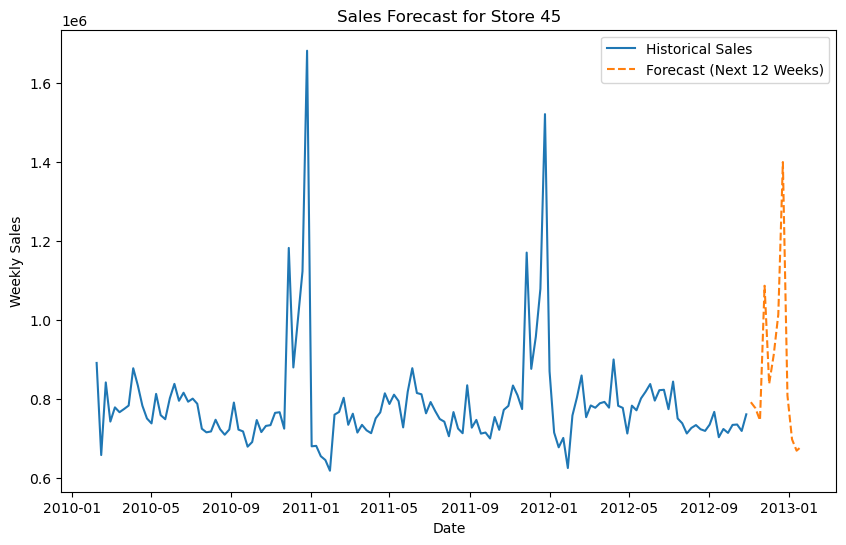

In [83]:
# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales, label='Historical Sales')
plt.plot(forecast, label=f'Forecast (Next {forecast_weeks} Weeks)', linestyle='--')
plt.title(f'Sales Forecast for Store {store}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()